In [1]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.5 MB/s eta 0:00:00


# Import Required Libraries

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score
%matplotlib inline

# Data Loading

In [3]:
# Data Loading
"""
Load the sales transactions dataset
"""
url = "https://raw.githubusercontent.com/sreelakshmiarjun27/DataMiningClustering/main/Sales_Transactions_Dataset_Weekly.csv"
dataset = pd.read_csv(url)
print("Initial Dataset Shape:", dataset.shape)
print("\nFirst few rows of the dataset:")
print(dataset.head())

Initial Dataset Shape: (811, 107)

First few rows of the dataset:
  Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0           P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1           P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2           P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3           P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4           P5   8   5  13  11   6   7   9  14   9  ...           0.27   

   Normalized 43  Normalized 44  Normalized 45  Normalized 46  Normalized 47  \
0           0.22           0.28           0.39           0.50           0.00   
1           0.40           0.50           0.10           0.10           0.40   
2           1.00           0.18           0.18           0.36           0.45   
3           0.47           0.06           0.12           0.24           0.35   
4           0.53           0.27           0.60           0.20           0.20   

   Norma

# Data Pre-Processing

In [4]:
# Data Cleaning
"""
Handle missing values and remove irrelevant columns
"""
# Check and handle missing values
print("\nMissing values before cleaning:")
print(dataset.isnull().sum().sum())

if dataset.isnull().sum().any():
    dataset.fillna(dataset.mean(), inplace=True)
    print("Missing values handled")

# Remove irrelevant columns
if 'Product_Code' in dataset.columns:
    dataset.drop('Product_Code', axis=1, inplace=True)
    print("Removed Product_Code column")

print("\nDataset shape after cleaning:", dataset.shape)



Missing values before cleaning:
0
Removed Product_Code column

Dataset shape after cleaning: (811, 106)


In [5]:
# Feature Engineering
"""
Create additional features for analysis
"""
# Calculate sales metrics
dataset['Total_Sales'] = dataset.iloc[:, 1:].sum(axis=1)
dataset['Average_Weekly_Sales'] = dataset.iloc[:, 1:].mean(axis=1)
dataset['Sales_Volatility'] = dataset.iloc[:, 1:].std(axis=1)
dataset['Peak_Sales'] = dataset.iloc[:, 1:].max(axis=1)
dataset['Min_Sales'] = dataset.iloc[:, 1:].min(axis=1)
dataset['Sales_Range'] = dataset['Peak_Sales'] - dataset['Min_Sales']

print("New features created:")
print(dataset[['Total_Sales', 'Average_Weekly_Sales', 'Sales_Volatility',
               'Peak_Sales', 'Min_Sales', 'Sales_Range']].describe())

New features created:
       Total_Sales  Average_Weekly_Sales  Sales_Volatility   Peak_Sales  \
count   811.000000            811.000000        811.000000   811.000000   
mean    490.162910              9.248357         47.196240   490.162910   
std     610.617477             11.521084         58.750965   610.617477   
min       3.000000              0.056604          0.331668     3.000000   
25%      31.300000              0.590566          3.065428    31.300000   
50%     225.480000              4.254340         21.799774   225.480000   
75%     611.620000             11.540000         58.895404   611.620000   
max    2294.480000             43.292075        220.892867  2294.480000   

       Min_Sales  Sales_Range  
count      811.0   811.000000  
mean         0.0   490.162910  
std          0.0   610.617477  
min          0.0     3.000000  
25%          0.0    31.300000  
50%          0.0   225.480000  
75%          0.0   611.620000  
max          0.0  2294.480000  


In [6]:
# Data Scaling
"""
Scale the features using StandardScaler
"""
# Select features for scaling
features_for_scaling = dataset.iloc[:, 1:]

# Apply scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_for_scaling)

print("Data scaled successfully")
print("Scaled data shape:", scaled_data.shape)


Data scaled successfully
Scaled data shape: (811, 111)


In [7]:
# Dimensionality Reduction
"""
Apply PCA for dimensionality reduction
"""
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("PCA completed")
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", sum(pca.explained_variance_ratio_))

PCA completed
Explained variance ratio: [0.57153456 0.07549601]
Cumulative explained variance: 0.6470305696724633


# Optimal K Determination

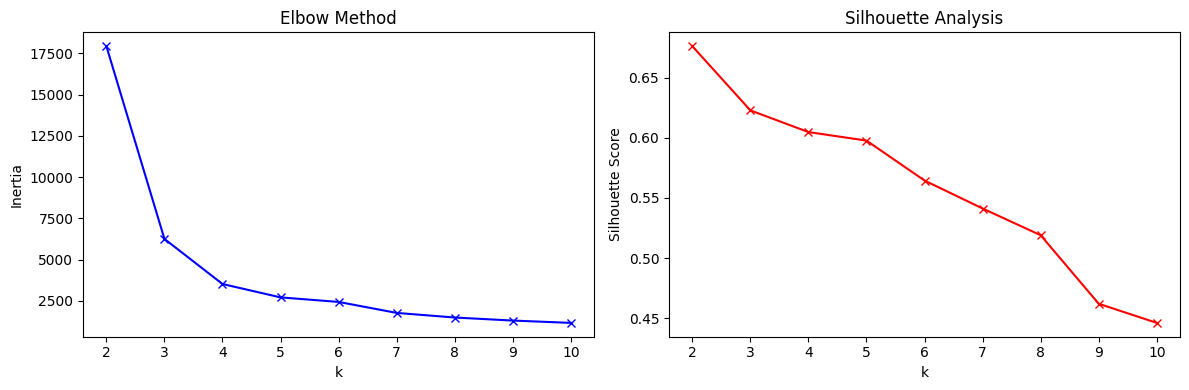


Optimal k suggestions:
Elbow Method: 3
Silhouette Score: 2
Final chosen k: 2


In [8]:
# Optimal K Determination
"""
Determine optimal number of clusters
"""
def plot_elbow_method(data, max_k=10):
    inertias = []
    silhouette_scores = []
    k_values = range(2, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(data, labels))

    plt.figure(figsize=(12, 4))

    # Inertia Plot
    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')

    # Silhouette Score Plot
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, 'rx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')

    plt.tight_layout()
    plt.show()

    return k_values, inertias, silhouette_scores

# Calculate optimal k
k_values, inertias, silhouette_scores = plot_elbow_method(pca_df)

# Find optimal k using multiple methods
optimal_k_elbow = k_values[np.argmax(np.abs(np.diff(np.diff(inertias)))) + 1]
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]

# Use the average of both methods
final_k = int(np.mean([optimal_k_elbow, optimal_k_silhouette]))
print(f"\nOptimal k suggestions:")
print(f"Elbow Method: {optimal_k_elbow}")
print(f"Silhouette Score: {optimal_k_silhouette}")
print(f"Final chosen k: {final_k}")


# Clustering Implementation

In [9]:
# Clustering Implementation
"""
Perform clustering using optimal k value
"""
# K-Means Clustering
kmeans = KMeans(n_clusters=final_k, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)
pca_df['KMeans_Cluster'] = kmeans_labels

# K-Medoids Clustering
kmedoids = KMedoids(n_clusters=final_k, random_state=42)
kmedoids_labels = kmedoids.fit_predict(pca_df.iloc[:, :2])
pca_df['KMedoids_Cluster'] = kmedoids_labels

# Calculate metrics
# K-Means Metrics
silhouette_kmeans = silhouette_score(pca_df.iloc[:, :2], kmeans_labels)
davies_kmeans = davies_bouldin_score(pca_df.iloc[:, :2], kmeans_labels)

# K-Medoids Metrics
silhouette_kmedoids = silhouette_score(pca_df.iloc[:, :2], kmedoids_labels)
davies_kmedoids = davies_bouldin_score(pca_df.iloc[:, :2], kmedoids_labels)

# Print Metrics
print("\nClustering Metrics:")
print(f"K-Means Silhouette Score: {silhouette_kmeans:.3f}")
print(f"K-Means Davies-Bouldin Score: {davies_kmeans:.3f}")
print(f"K-Medoids Silhouette Score: {silhouette_kmedoids:.3f}")
print(f"K-Medoids Davies-Bouldin Score: {davies_kmedoids:.3f}")





Clustering Metrics:
K-Means Silhouette Score: 0.676
K-Means Davies-Bouldin Score: 0.423
K-Medoids Silhouette Score: 0.513
K-Medoids Davies-Bouldin Score: 0.791


# Create visualizations and analysis of clustering results

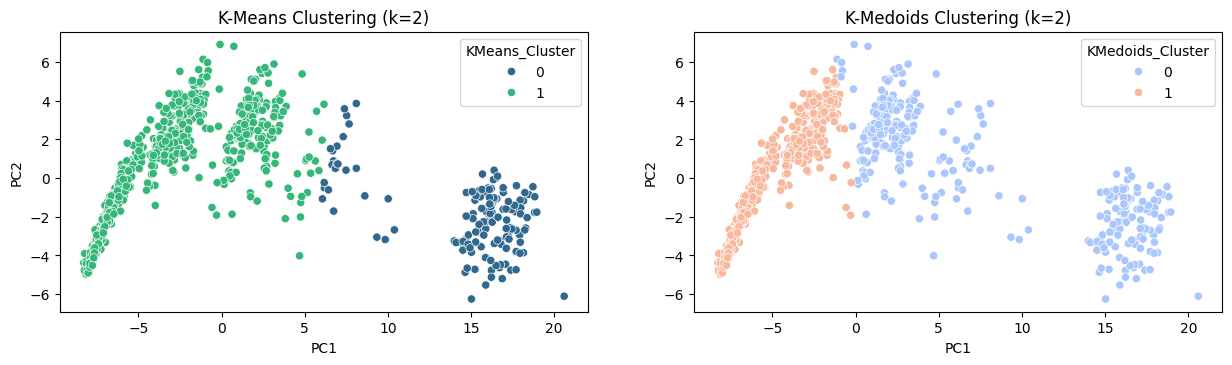

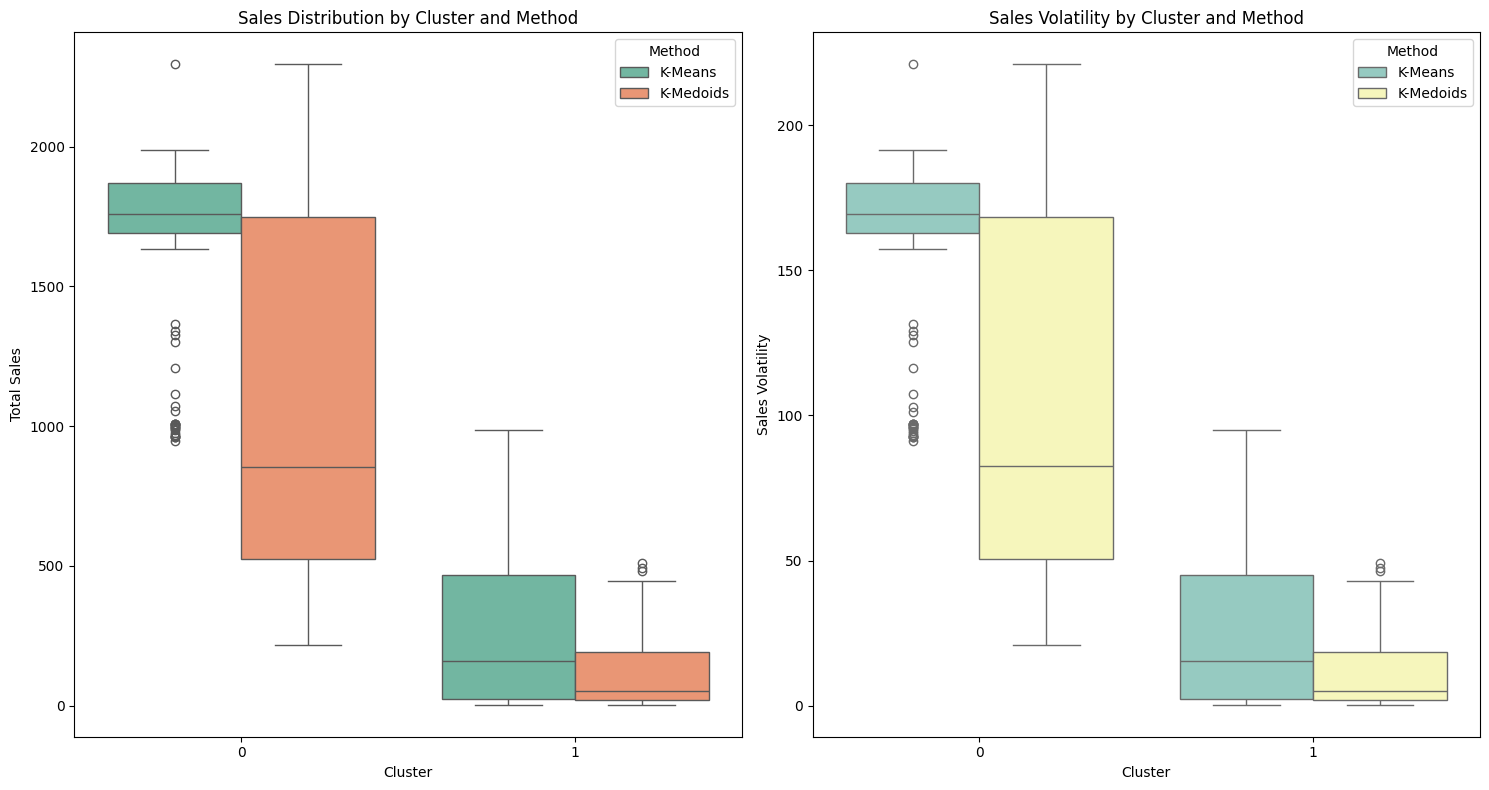

In [12]:
# Visualization and Analysis
"""
Create visualizations and analysis of clustering results
"""
plt.figure(figsize=(15, 8))

# Scatter Plots
plt.subplot(2, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='viridis')
plt.title(f'K-Means Clustering (k={final_k})')

plt.subplot(2, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='KMedoids_Cluster', data=pca_df, palette='coolwarm')
plt.title(f'K-Medoids Clustering (k={final_k})')

# Prepare Data for Combined Boxplots
pca_df_combined = pca_df[['KMeans_Cluster', 'KMedoids_Cluster']].copy()
pca_df_combined['Total_Sales'] = dataset['Total_Sales']
pca_df_combined['Sales_Volatility'] = dataset['Sales_Volatility']

# Prepare the data to create a 'long format' suitable for combined boxplots
combined_data = pd.melt(
    pca_df_combined.reset_index(),
    id_vars=['index', 'Total_Sales', 'Sales_Volatility'],
    value_vars=['KMeans_Cluster', 'KMedoids_Cluster'],
    var_name='Method',
    value_name='Cluster'
)

# Update the 'Method' column for clarity
combined_data['Method'] = combined_data['Method'].replace({
    'KMeans_Cluster': 'K-Means',
    'KMedoids_Cluster': 'K-Medoids'
})

# Visualization
plt.figure(figsize=(15, 8))

# Boxplot for Sales Distribution
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Total_Sales', hue='Method', data=combined_data, palette='Set2')
plt.title('Sales Distribution by Cluster and Method')
plt.xlabel('Cluster')
plt.ylabel('Total Sales')


# Boxplot for Volatility Analysis
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Sales_Volatility', hue='Method', data=combined_data, palette='Set3')
plt.title('Sales Volatility by Cluster and Method')
plt.xlabel('Cluster')
plt.ylabel('Sales Volatility')

plt.tight_layout()
plt.show()




# Extract key business insights from clustering results

In [13]:
# Cluster Profiling for K-Means
analysis_kmeans = dataset.join(pca_df['KMeans_Cluster'])
kmeans_profiles = analysis_kmeans.groupby('KMeans_Cluster').agg({
    'Total_Sales': 'mean',
    'Sales_Volatility': 'mean',
    'Sales_Range': 'mean'
}).round(2)

print("\nK-Means Cluster Profiles:")
print(kmeans_profiles)

# Risk Assessment for K-Means
kmeans_risk = analysis_kmeans.groupby('KMeans_Cluster').agg({
    'Sales_Volatility': lambda x: 'High Risk' if x.mean() > x.median() else 'Low Risk',
    'Total_Sales': lambda x: 'High Value' if x.mean() > x.median() else 'Low Value'
})

print("\nK-Means Risk Assessment by Cluster:")
print(kmeans_risk)

# Cluster Profiling for K-Medoids
analysis_kmedoids = dataset.join(pca_df['KMedoids_Cluster'])
kmedoids_profiles = analysis_kmedoids.groupby('KMedoids_Cluster').agg({
    'Total_Sales': 'mean',
    'Sales_Volatility': 'mean',
    'Sales_Range': 'mean'
}).round(2)

print("\nK-Medoids Cluster Profiles:")
print(kmedoids_profiles)

# Risk Assessment for K-Medoids
kmedoids_risk = analysis_kmedoids.groupby('KMedoids_Cluster').agg({
    'Sales_Volatility': lambda x: 'High Risk' if x.mean() > x.median() else 'Low Risk',
    'Total_Sales': lambda x: 'High Value' if x.mean() > x.median() else 'Low Value'
})

print("\nK-Medoids Risk Assessment by Cluster:")
print(kmedoids_risk)



K-Means Cluster Profiles:
                Total_Sales  Sales_Volatility  Sales_Range
KMeans_Cluster                                            
0                   1675.92            161.29      1675.92
1                    229.83             22.15       229.83

K-Means Risk Assessment by Cluster:
               Sales_Volatility Total_Sales
KMeans_Cluster                             
0                      Low Risk   Low Value
1                     High Risk  High Value

K-Medoids Cluster Profiles:
                  Total_Sales  Sales_Volatility  Sales_Range
KMedoids_Cluster                                            
0                     1074.53            103.42      1074.53
1                      103.38              9.98       103.38

K-Medoids Risk Assessment by Cluster:
                 Sales_Volatility Total_Sales
KMedoids_Cluster                             
0                       High Risk  High Value
1                       High Risk  High Value
